In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

2023-01-07 15:57:49.646750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-07 15:57:49.646776: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-07 15:57:51.062574: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-07 15:57:51.062707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-07 15:57:51.062717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
w=32

In [3]:
#print(dataFromSensors)
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fe99e57f010
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fe99e1de010
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
train_y.shape

(380244,)

In [14]:
train_y=train_y.reshape(train_y.shape[0],1)

In [15]:
test_y=test_y.reshape(test_y.shape[0],1)

In [16]:
#print(train_X)

In [17]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [18]:
model_gru =  keras.models.Sequential([
  
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=64,activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['AUC'])

2023-01-07 15:57:56.432305: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-07 15:57:56.432843: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-07 15:57:56.432902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (server-OptiPlex-7010): /proc/driver/nvidia/version does not exist


In [19]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 32, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [20]:
 start = t.time()

In [21]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140


2023-01-07 15:57:57.666292: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 730068480 exceeds 10% of free system memory.


2971/2971 [==============================] - ETA: 0s - loss: 0.5732 - auc: 0.5323

2023-01-07 16:07:15.523771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 182517120 exceeds 10% of free system memory.


2971/2971 [==============================] - 608s 203ms/step - loss: 0.5732 - auc: 0.5323 - val_loss: 0.5583 - val_auc: 0.5860
Epoch 2/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.5698 - auc: 0.6020 - val_loss: 0.5526 - val_auc: 0.6656
Epoch 3/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.5554 - auc: 0.6622 - val_loss: 0.5272 - val_auc: 0.6933
Epoch 4/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.5211 - auc: 0.7120 - val_loss: 0.4920 - val_auc: 0.7338
Epoch 5/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.5029 - auc: 0.7328 - val_loss: 0.4848 - val_auc: 0.7389
Epoch 6/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.4974 - auc: 0.7386 - val_loss: 0.4884 - val_auc: 0.7427
Epoch 7/140
2971/2971 [==============================] - 606s 204ms/step - loss: 0.4920 - auc: 0.7469 - val_loss: 0.4795 - val_auc: 0.7486
Epoch 8/140
2971/2971 [================

2971/2971 [==============================] - 601s 202ms/step - loss: 0.4264 - auc: 0.8285 - val_loss: 0.4266 - val_auc: 0.8174
Epoch 60/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4264 - auc: 0.8285 - val_loss: 0.4278 - val_auc: 0.8171
Epoch 61/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4262 - auc: 0.8287 - val_loss: 0.4276 - val_auc: 0.8181
Epoch 62/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4261 - auc: 0.8288 - val_loss: 0.4500 - val_auc: 0.8137
Epoch 63/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4256 - auc: 0.8292 - val_loss: 0.4288 - val_auc: 0.8172
Epoch 64/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4254 - auc: 0.8295 - val_loss: 0.4306 - val_auc: 0.8172
Epoch 65/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4254 - auc: 0.8294 - val_loss: 0.4276 - val_auc: 0.8185
Epoch 66/140
2971/2971 [=========

2971/2971 [==============================] - 601s 202ms/step - loss: 0.4169 - auc: 0.8376 - val_loss: 0.4265 - val_auc: 0.8175
Epoch 118/140
2971/2971 [==============================] - 602s 203ms/step - loss: 0.4169 - auc: 0.8377 - val_loss: 0.4381 - val_auc: 0.8192
Epoch 119/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4168 - auc: 0.8379 - val_loss: 0.4316 - val_auc: 0.8150
Epoch 120/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4164 - auc: 0.8381 - val_loss: 0.4293 - val_auc: 0.8185
Epoch 121/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4163 - auc: 0.8382 - val_loss: 0.4309 - val_auc: 0.8164
Epoch 122/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4163 - auc: 0.8383 - val_loss: 0.4261 - val_auc: 0.8184
Epoch 123/140
2971/2971 [==============================] - 601s 202ms/step - loss: 0.4160 - auc: 0.8385 - val_loss: 0.4300 - val_auc: 0.8167
Epoch 124/140
2971/2971 [==

In [22]:
pred_y =  model_gru.predict(test_X)

2023-01-08 15:28:53.082382: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 182517120 exceeds 10% of free system memory.


2971/2971 [==============================] - 85s 29ms/step


In [23]:
stop=t.time()-start
print(stop)

84743.47366642952


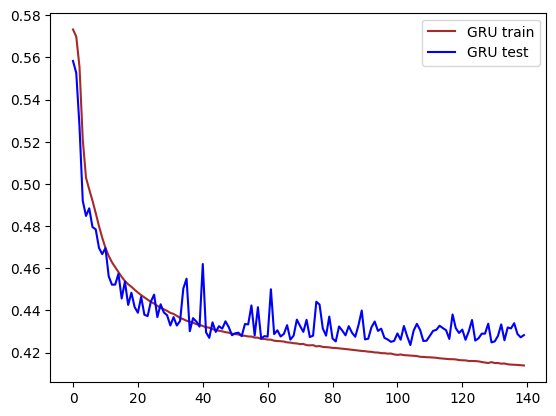

In [24]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [25]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [26]:
np.shape(pred_y)

(95061, 1)

In [27]:
pred_y

array([[0.00098622],
       [0.00317511],
       [0.00070283],
       ...,
       [0.04980322],
       [0.05096111],
       [0.05001492]], dtype=float32)

In [28]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,95061)

In [29]:

#plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
#plt.plot(test_y, label = 'Actual')
#plt.plot(pred_y, label = 'Predicted')
#plt.legend()
#plt.show()

0.1439157868696787
0.22613168829583474
0.37936234245069544
0.28934662721415727


In [30]:
np.shape(train_X)

(380244, 32, 15)

In [31]:
np.shape(train_y)

(380244, 1)

In [32]:
np.shape(test_X)

(95061, 32, 15)

In [33]:
np.shape(test_y)

(95061, 1)

In [ ]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
#plt.plot(tes, label = 'Actual')
#plt.plot(fp, label = 'Predicted')
#plt.legend()
#plt.show()

In [ ]:
#over small part of data
#plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
#plt.legend()
#plt.show()

In [ ]:
print(sum(tes)/len(tes))

In [ ]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

In [ ]:
#plt.plot(tes[:8000], label = 'Actual')
#plt.plot(fp[:8000], label = 'Predicted')
#plt.legend()
#plt.show()

In [ ]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()